# Plotting results

#### Jukes Liu. Last modified 10-27-2019.

In [1]:
import numpy as np
# import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
# from time import sleep
# from IPython.display import clear_output
# import scipy.stats
import datetime
# import shutil

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"
BoxIDs = ['120', '174', '277']
dfs = []

### Load in csv files with terminus position and change rates for the glaciers

In [2]:
df1 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[0]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df1.shape)
dfs.append(df1)
df1.head()

(96, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330172013102LGN01,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-04-12,192274.8242187500,1,585.0,NaN
1,LC82330172013150LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-30,366286.2929687500,1,570.0,-0.3125
2,LC82330172013246LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,190739.0075683594,1,570.0,-0.10416666666666667
3,LC82320172013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,189950.8090820312,1,600.0,0.09803921568627451
4,LC82320182013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,183872.8505859375,1,570.0,-0.09803921568627451


In [3]:
df2 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[1]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df2.shape)
dfs.append(df2)
df2.head()

(53, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330172013230LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,324889.1918945312,1,742.5,NaN
1,LC82320172013271LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,200213.0487060547,1,727.5,-0.36585365853658536
2,LC82330172013310LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-06,20392.8789367676,1,652.5,-1.125
3,LC82320172013319LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-15,37953.7446594238,1,682.5,-0.6741573033707865
4,LC82330172013342LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2013-12-08,1452.2151508331,2,862.5,1.0714285714285714


In [4]:
df3 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[2]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df3.shape)
dfs.append(df3)
df3.head()

(75, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330152013102LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-04-12,196694.0876464844,1,757.5,NaN
1,LC82330152013118LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_004.dat,terminus_trim_004.dat,004,2013-04-28,6779.9871826172,1,772.5,0.9375
2,LC80010142013141LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-21,580202.1381835938,1,727.5,-0.7692307692307693
3,LC82330152013246LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,196515.6408691406,1,697.5,-0.4166666666666667
4,LC82320152013255LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,414488.2060546875,1,712.5,-0.29411764705882354


### Convert all dates to datetime objects and all terminus positions and changerates to floats

In [5]:
#maximum terminus position for the glaciers
max_pos = {'120' : 630.0, '174' : 772.5, '277': 832.5}

In [6]:
#Turn datetimes from datetime_df into DateTime objects
#grab the datetime strings
for df in dfs:
    datetimes = list(df['datetimes'])
    term_positions = list(df['term_position'])
    changerates = list(df['changerate'])
    BoxID = list(df['BoxID'])[0]
    print(BoxID)
    
    max_position = max_pos[BoxID]
     
    #create list to store the new data
    datetime_objs = []
    tpositions = []
    changes = []

    for date in datetimes:
        date = str(date)
        datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
        datetime_obj = np.datetime64(datetime_obj)
        datetime_objs.append(datetime_obj)
    
    for tpos in term_positions:
        tpos = float(tpos)
        tpos = tpos - max_position
        tpositions.append(tpos)
        
    for crate in changerates:
        crate = float(crate)
        changes.append(crate)

    #add the datetime objects back into the datetime column
    df['datetimes'] = datetime_objs
    df['term_position'] = tpositions
    df['changerate'] = changes

120
174
277


In [7]:
df1

,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330172013102LGN01,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-04-12,192274.8242187500,1,-45.0,NaN
1,LC82330172013150LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-30,366286.2929687500,1,-60.0,-0.312500
2,LC82330172013246LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,190739.0075683594,1,-60.0,-0.104167
3,LC82320172013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,189950.8090820312,1,-30.0,0.098039
4,LC82320182013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,183872.8505859375,1,-60.0,-0.098039
5,LC82320172013271LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,201121.0952148438,1,-45.0,0.123967
6,LC82320182013271LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,187165.1591796875,1,-60.0,0.000000
7,LC82330172013294LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-10-21,152041.7546386719,1,-60.0,0.000000
8,LC82330172013310LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-06,95853.2226562500,1,-75.0,-0.093750
9,LC82320182013335LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-12-01,30378.0737304688,1,-60.0,0.000000


## Plot:

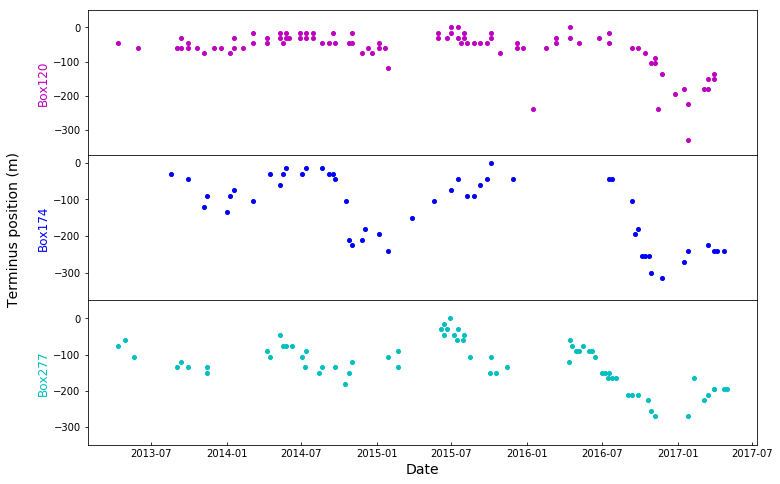

In [11]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(df1['datetimes'], df1['term_position'], 'mo', markersize='4')
# axs[0].set_ylim(250, 750)
axs[0].set_ylim(-375, 50)
axs[0].set_ylabel('Box'+BoxIDs[0], fontsize=12, color='m')
axs[0].tick_params(direction='out', colors='k')

axs[1].plot(df2['datetimes'], df2['term_position'], 'bo', markersize='4')
axs[1].set_ylim(-375, 20)
axs[1].set_ylabel('Box'+BoxIDs[1], fontsize=12, color = 'b')
axs[1].tick_params(direction='out', colors='k')

axs[2].plot(df3['datetimes'], df3['term_position'], 'co', markersize='4')
axs[2].set_ylim(-350, 50)
axs[2].set_ylabel('Box'+BoxIDs[2], fontsize=12, color ='c')
axs[2].tick_params(axis = 'y', direction='out', colors='k')
axs[2].tick_params(axis = 'x', direction='in', colors='k')

#Set common x label
for ax in axs:
    ax.set_xlabel('Date', fontsize=14)

#Set common y label
fig.text(0.04, 0.5, 'Terminus position (m)', va='center', ha='center', rotation='vertical', fontsize=14)

#Save figure
plt.savefig(csvpaths+"/Figures/Tpos_timeseries_"+str(datetime. datetime. today())[:-16]+".png", dpi=500, bbox_inches='tight')

plt.show()

In [128]:
df3.sort_values(by='term_position', ascending=False)

,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
24,LC82320152014322LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2014-11-18,526.0464305878,2,1357.5,1.493056
32,LC80010142015179LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2015-06-28,66295.9066772461,1,832.5,0.228041
30,LC82320152015165LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_004.dat,terminus_trim_004.dat,004,2015-06-14,4068.9017143250,4,817.5,0.192308
35,LC82320152015197LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_004.dat,terminus_trim_004.dat,004,2015-07-16,38980.8709716797,3,802.5,0.172131
31,LC82330152015172LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2015-06-21,27343.6122131348,1,802.5,0.166403
28,LC82330152015156LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2015-06-05,141766.8574218750,1,802.5,0.170732
37,LC82320152015213LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_002.dat,terminus_trim_002.dat,002,2015-08-01,125355.6890869141,2,787.5,0.168269
33,LC82330152015188LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_002.dat,terminus_trim_002.dat,002,2015-07-07,166886.3784179688,2,787.5,0.149750
10,LC82320152014130LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2014-05-10,677615.5546875000,1,787.5,0.169492
29,LC80010142015163LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_005.dat,terminus_trim_005.dat,005,2015-06-12,2317.5526962280,3,787.5,0.144695
